# Construindo modelos de machine learning para o diagnóstico de COVID-19

In [20]:
## Passo 1: Corrigindo os problemas de incompatibilidades de sklearn e Lazypredict
## Passo 2: Instalando o pacote lazypredict
## Passo 3: importação e visualização do banco de dados pre-tratada
## passo 4: Definindo as variáveis preditoras e de resposta
## passo 5: Seleção de variáveis importantes
## Passo 6: divisão dos dados de treinamento e de teste
## Passo 7: Treinamento de diversos algoritmos
## Passo 8: Seleção do melhor algoritmo
## Passo 9: Otimização dos hiperparámetros
## Passo 10: Teste do melhor algorítmo
## Passo 11: Salvando o modelo para o deploy

In [21]:
## Passo 1: Corrigindo os problemas de incompatibilidades de sklearn e Lazypredict
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.1

Found existing installation: scikit-learn 0.23.1
Uninstalling scikit-learn-0.23.1:
  Successfully uninstalled scikit-learn-0.23.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.23.1-cp37-cp37m-manylinux1_x86_64.whl (6.8 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [1]:
## Passo 2: Instalando o pacote lazypredict 
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
## Passo 3: importação e visualização do banco de dados pre-tratada
### 3.1: Importando o dataset

from google.colab import files
uploaded = files.upload()

Saving dataset_tratado.csv to dataset_tratado (4).csv


In [3]:
### 3.2: Visualizando o dataset importado

import pandas as pd
dataset_df = pd.read_csv("dataset_tratado.csv")
display (dataset_df.head())

,Sex,Age,CA,CK,CREA,ALP,GGT,GLU,AST,ALT,...,LY,MO,EO,BA,NET,LYT,MOT,EOT,BAT,target
0,1.0,82.0,2.09,86.0,1.150,95.0,40.0,78.0,26.0,21.0,...,13.4,9.50,2.9,0.5,6.40,1.200,0.8,0.3,0.0,Healthy
1,1.0,58.0,2.11,86.0,1.000,80.0,147.0,106.0,41.0,36.0,...,11.2,7.30,0.3,0.1,5.45,0.750,0.5,0.0,0.0,Healthy
2,0.0,82.0,2.27,138.0,0.755,123.5,176.5,106.0,114.0,63.0,...,36.5,9.50,1.7,0.9,3.60,2.600,0.7,0.1,0.1,Healthy
3,1.0,79.0,2.07,73.0,1.810,62.0,36.5,96.0,28.0,38.5,...,44.0,10.00,8.5,0.5,0.40,0.500,0.1,0.1,0.0,Healthy
4,0.0,9.0,2.29,104.0,0.640,131.0,16.0,105.0,25.0,13.0,...,16.6,7.45,0.2,0.3,5.30,1.195,0.5,0.0,0.0,Healthy


In [4]:
### 3.3: Lembrando a composição do  dataset
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     1736 non-null   float64
 1   Age     1736 non-null   float64
 2   CA      1736 non-null   float64
 3   CK      1736 non-null   float64
 4   CREA    1736 non-null   float64
 5   ALP     1736 non-null   float64
 6   GGT     1736 non-null   float64
 7   GLU     1736 non-null   float64
 8   AST     1736 non-null   float64
 9   ALT     1736 non-null   float64
 10  LDH     1736 non-null   float64
 11  PCR     1736 non-null   float64
 12  KAL     1736 non-null   float64
 13  NAT     1736 non-null   float64
 14  UREA    1736 non-null   float64
 15  WBC     1736 non-null   float64
 16  RBC     1736 non-null   float64
 17  HGB     1736 non-null   float64
 18  HCT     1736 non-null   float64
 19  MCV     1736 non-null   float64
 20  MCH     1736 non-null   float64
 21  MCHC    1736 non-null   float64
 22  

In [5]:
## passo 4: Definindo as variáveis preditoras e de resposta
x = dataset_df.drop("target", axis = 1)
y = dataset_df["target"]

In [6]:
x

,Sex,Age,CA,CK,CREA,ALP,GGT,GLU,AST,ALT,...,NE,LY,MO,EO,BA,NET,LYT,MOT,EOT,BAT
0,1.0,82.0,2.090000,86.0,1.150000,95.0,40.0,78.000000,26.0,21.000000,...,73.700000,13.400000,9.500000,2.900000,0.500000,6.400000,1.200000,0.800000,0.300000,0.000000
1,1.0,58.0,2.110000,86.0,1.000000,80.0,147.0,106.000000,41.0,36.000000,...,81.100000,11.200000,7.300000,0.300000,0.100000,5.450000,0.750000,0.500000,0.000000,0.000000
2,0.0,82.0,2.270000,138.0,0.755000,123.5,176.5,106.000000,114.0,63.000000,...,51.400000,36.500000,9.500000,1.700000,0.900000,3.600000,2.600000,0.700000,0.100000,0.100000
3,1.0,79.0,2.070000,73.0,1.810000,62.0,36.5,96.000000,28.0,38.500000,...,37.000000,44.000000,10.000000,8.500000,0.500000,0.400000,0.500000,0.100000,0.100000,0.000000
4,0.0,9.0,2.290000,104.0,0.640000,131.0,16.0,105.000000,25.0,13.000000,...,74.000000,16.600000,7.450000,0.200000,0.300000,5.300000,1.195000,0.500000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,0.0,66.0,2.145700,86.0,0.550000,71.5,54.0,104.000000,22.5,21.500000,...,56.800000,25.600000,13.650000,3.450000,0.500000,2.320000,1.040000,0.560000,0.140000,0.020000
1732,0.0,80.0,2.140710,86.0,0.550000,71.5,34.0,91.200000,22.2,27.800000,...,75.683333,17.466667,6.266667,0.316667,0.266667,6.840000,1.373333,0.530000,0.023333,0.020000
1733,1.0,58.0,2.012633,79.0,0.736667,42.0,20.0,100.333333,21.0,35.000000,...,54.800000,31.933333,11.800000,1.366667,0.100000,1.886667,1.116667,0.410000,0.050000,0.003333
1734,1.0,76.0,2.200000,86.0,0.940000,76.0,22.0,104.000000,26.0,22.000000,...,71.500000,18.900000,7.200000,2.200000,0.200000,4.150000,1.100000,0.420000,0.130000,0.010000


In [7]:
y

0        Healthy
1        Healthy
2        Healthy
3        Healthy
4        Healthy
          ...   
1731    COVID-19
1732    COVID-19
1733    COVID-19
1734    COVID-19
1735    COVID-19
Name: target, Length: 1736, dtype: object

In [8]:
## passo 5: Seleção de variáveis importantes
## Nota importante: Das 33 variáveis iniciais, 3 variáveis foram removidas por apresentarem variáncia constante.


### 3.1. Removendo biomarcadores com baixa variáncia
from sklearn.feature_selection import VarianceThreshold

def remove_baixa_variancia(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]
x = remove_baixa_variancia(x, threshold=0.1)
x

,Sex,Age,CA,CK,CREA,ALP,GGT,GLU,AST,ALT,...,MCH,MCHC,PLT1,NE,LY,MO,EO,NET,LYT,MOT
0,1.0,82.0,2.090000,86.0,1.150000,95.0,40.0,78.000000,26.0,21.000000,...,34.700000,34.450000,200.500000,73.700000,13.400000,9.500000,2.900000,6.400000,1.200000,0.800000
1,1.0,58.0,2.110000,86.0,1.000000,80.0,147.0,106.000000,41.0,36.000000,...,28.650000,34.000000,200.000000,81.100000,11.200000,7.300000,0.300000,5.450000,0.750000,0.500000
2,0.0,82.0,2.270000,138.0,0.755000,123.5,176.5,106.000000,114.0,63.000000,...,29.000000,34.300000,209.500000,51.400000,36.500000,9.500000,1.700000,3.600000,2.600000,0.700000
3,1.0,79.0,2.070000,73.0,1.810000,62.0,36.5,96.000000,28.0,38.500000,...,31.766667,32.300000,55.333333,37.000000,44.000000,10.000000,8.500000,0.400000,0.500000,0.100000
4,0.0,9.0,2.290000,104.0,0.640000,131.0,16.0,105.000000,25.0,13.000000,...,26.300000,34.200000,303.000000,74.000000,16.600000,7.450000,0.200000,5.300000,1.195000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,0.0,66.0,2.145700,86.0,0.550000,71.5,54.0,104.000000,22.5,21.500000,...,29.200000,32.450000,413.000000,56.800000,25.600000,13.650000,3.450000,2.320000,1.040000,0.560000
1732,0.0,80.0,2.140710,86.0,0.550000,71.5,34.0,91.200000,22.2,27.800000,...,30.233333,32.700000,513.833333,75.683333,17.466667,6.266667,0.316667,6.840000,1.373333,0.530000
1733,1.0,58.0,2.012633,79.0,0.736667,42.0,20.0,100.333333,21.0,35.000000,...,30.633333,33.800000,180.333333,54.800000,31.933333,11.800000,1.366667,1.886667,1.116667,0.410000
1734,1.0,76.0,2.200000,86.0,0.940000,76.0,22.0,104.000000,26.0,22.000000,...,28.600000,33.700000,281.000000,71.500000,18.900000,7.200000,2.200000,4.150000,1.100000,0.420000


In [13]:
## Passo 6: Machine learning propriamente dito

### 6.1. Importando pacotes de visualização dos resultados dos modelos de machine learning
import seaborn as sns

### 6.2. Importando pacotes para construção de vários modelos de machine learning
import lazypredict
from lazypredict.Supervised import LazyClassifier

### 6.3. Importando pacotes para a divisão dos dados de treinamento e de teste 

import sklearn
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5, random_state=123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
modelos,predições = clf.fit(x_treino, x_teste, y_treino, y_teste)

print(modelos)




100%|██████████| 29/29 [00:03<00:00,  8.21it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
RidgeClassifier                    0.82               0.82    None      0.82   
RandomForestClassifier             0.82               0.81    None      0.81   
RidgeClassifierCV                  0.81               0.81    None      0.81   
LinearSVC                          0.81               0.81    None      0.81   
ExtraTreesClassifier               0.81               0.81    None      0.81   
LinearDiscriminantAnalysis         0.81               0.81    None      0.81   
CalibratedClassifierCV             0.81               0.81    None      0.81   
SVC                                0.80               0.80    None      0.80   
XGBClassifier                      0.80               0.80    None      0.80   
LogisticRegression                 0.80               0.80    None      0.80   
NuSVC                              0.80 

In [ ]:
### Passo

In [18]:
### 6.4 Visualizando melhor os resultados de machine learning
#### Observações: O modelo RidgeClassifier foi o que teve melhor desempenho (F1 Score de 82%) e menor tempo de treinamento
display(modelos)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifier,0.82,0.82,None,0.82,0.05
RandomForestClassifier,0.82,0.81,None,0.81,0.42
RidgeClassifierCV,0.81,0.81,None,0.81,0.08
LinearSVC,0.81,0.81,None,0.81,0.14
ExtraTreesClassifier,0.81,0.81,None,0.81,0.24
LinearDiscriminantAnalysis,0.81,0.81,None,0.81,0.05
CalibratedClassifierCV,0.81,0.81,None,0.81,0.38
SVC,0.80,0.80,None,0.80,0.13
XGBClassifier,0.80,0.80,None,0.80,0.25


[(0.0, 1.0)]

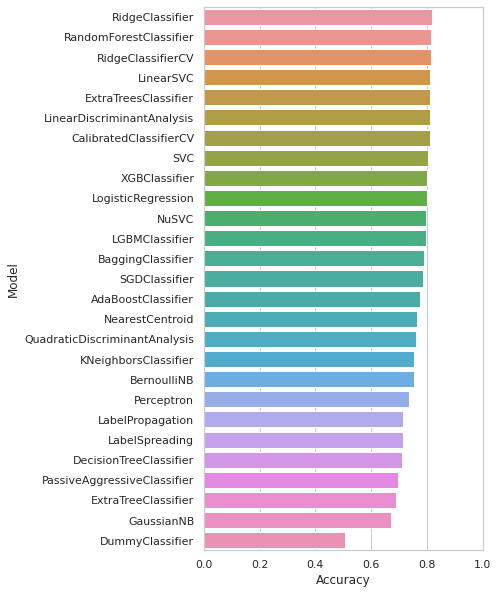

In [20]:
### 6.5 Visualizando os resultados da performance

# Gráfico de Acurácia diagnóstica
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predições.index, x="Accuracy", data=predições)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

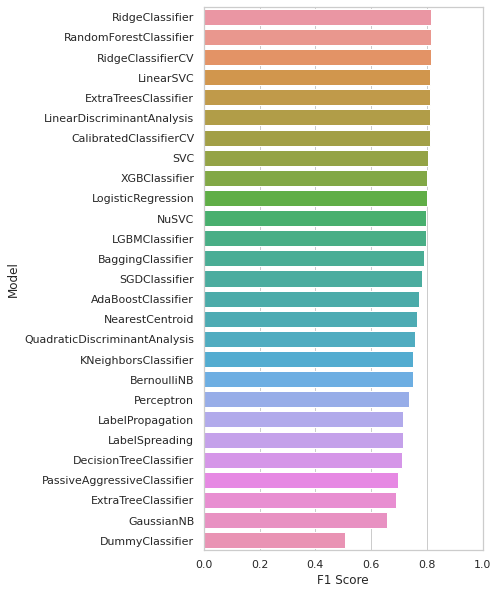

In [21]:
### 6.6 Visualizando os resultados da performance

# Gráfico de F1 Score
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predições.index, x="F1 Score", data=predições)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

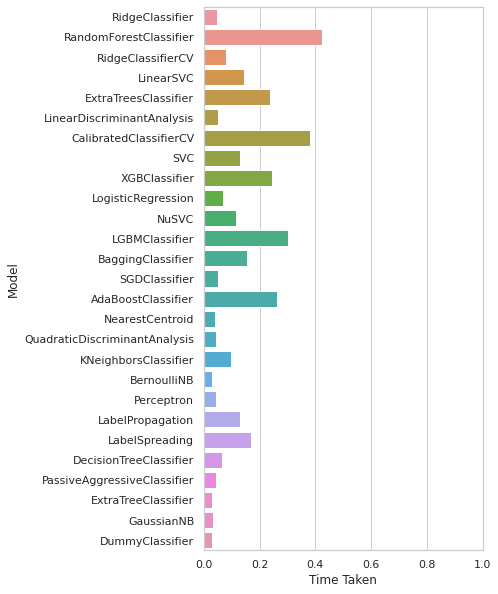

In [23]:
### 6.7 Visualizando os resultados da performance

# Gráfico de Tempo de treinamento
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predições.index, x="Time Taken", data=predições)
ax.set(xlim=(0, 1))

In [25]:
## Passo 8: Seleção do melhor algoritmo

### 8.1.  Importando bibliotecas

from sklearn.linear_model import RidgeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
### 8.2 Randomizando os dados
x, y = make_classification(n_samples=1736, n_features=30, 
                           n_classes=2, 
                           n_clusters_per_class=1)


x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5, random_state=123)

In [28]:
### 8.3 Definindo o classificador: Ridge Classifier

rc = RidgeClassifier()
print(rc)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=True, random_state=None, solver='auto',
                tol=0.001)

RidgeClassifier()


RidgeClassifier(normalize=True)

In [29]:
### 8.4 Treinando o modelo: Ajustando o modelo e calculando a acurácia
rc.fit(x_treino, y_treino)
score = rc.score(x_treino, y_treino)
print("Score: ", score)


Score:  0.9251152073732719


In [33]:
### 8.5 Utilizando a validação cruzada para verificar se melhora a curácia diagnóstica
### Observação 1: Com a validação cruzada, não melhorou nada. 
### Observação 2: Usaremos o modelo sem a validação cruzada


cv_scores = cross_val_score(rc, x_treino, y_treino, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.92


In [34]:
### 8.6 Usando o modelo treinando para Predizer as amostras de teste

y_predito = rc.predict(x_teste)

matriz_confusão = confusion_matrix(y_teste, y_predito)
print(matriz_confusão)

[[426   2]
 [ 45 395]]


In [36]:
### 8.7 Gerando o relatório de classificação usando outras métricas de acurácia atraves dos dados
###  Importante destacar que estamos usando os dados de teste
cr = classification_report(y_teste, y_predito)
print(cr)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       428
           1       0.99      0.90      0.94       440

    accuracy                           0.95       868
   macro avg       0.95      0.95      0.95       868
weighted avg       0.95      0.95      0.95       868



# Conclusões sobre o modelo:

In [38]:
### Diversos modeleos de Machine learning foram testados
### O classificador Ridge classifier foi o que teve melhor acurácia diagnóstica (F1-Score = 95%)
### Os resultados de Machine learning estão correlacionados com as observações da análise exploratória

In [39]:
## Passo 10 Salvando o modelo para deploy. Salvando no Formato pickle
import pickle

filename = 'Modelo_finalizado.sav'
pickle.dump(rc, open(filename, 'wb'))
